# 今彩539 中獎預測
玩法:在1-39數字中，取5個數字，取出不放回

中獎:<br>
    頭獎 -> 中5個數字<br>
    二獎 -> 中4個數字<br>
    三獎 -> 中3個數字<br>
    四獎 -> 中2個數字<br>
    

## 題目1: 計算各獎中獎機率，並繪製直方圖

Jackpot機率= 0.00017%
Second prize機率= 0.02953%
Third prize機率= 0.97437%
Forth prize機率= 10.39327%


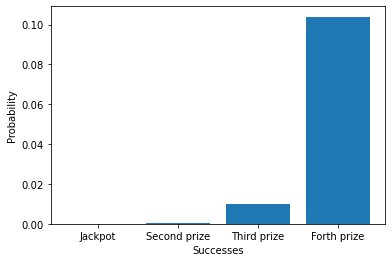

In [62]:
%matplotlib inline
from scipy import special as sps
from matplotlib import pyplot as plt
import numpy as np

allNums = 39 #39數字中
trials = 5  #取5個數字
nonTrials = allNums - trials

possibilities = sps.comb(allNums, trials, exact=True) #樣本空間為無順序之組合事件，計算式為C(39,5)
'''
#嘗試計算頭獎與貳獎
n1 = sps.comb(trials, trials, exact=True)*sps.comb(nonTrials, 0, exact=True) # 事件為相依事件，計算式為: C(5,5)*C(34,0)
p1 = n1/possibilities # 事件機率 = 事件/樣本空間 
print(p1)

n2 = sps.comb(trials, trials-1, exact=True)*sps.comb(nonTrials, 1, exact=True) # 事件: C(5,4)*C(34,1)
p2 = n2/possibilities
print(p2)
'''

#數據放入串列
x = np.array(range(0, trials-1))
#X軸為獎項
xAxil = ["Jackpot", "Second prize", "Third prize", "Forth prize"]
#y軸:機率
p = np.array([sps.comb(trials, trials-i, exact=True)*sps.comb(nonTrials, i, exact=True)/possibilities for i in x])

#列印
for i in range(0, len(p)):
    print('{}機率= {:.5f}%'.format(xAxil[i], p[i]*100))
    
   
# Set up the graph
plt.xlabel('Successes')
plt.ylabel('Probability')
plt.bar(xAxil, p)
plt.show()


## 題目2: 計算報酬率
    每注平均中獎金額
    報酬率 = (每注平均中獎金額-每注下注金額) /每注下注金額


每注50元<br>
頭獎 -> 8000000元<br>
二獎 -> 200000元<br>
三獎 -> 300元<br>
四獎 -> 50元

In [78]:
#計算每注平均中獎金額 total
m = np.array([p[0]*8000000, p[1]*20000, p[2]*300, p[3]*50]) #各獎項*獎金
total = 0  #加總
for i in range(0, len(m)):
    #print(m[i])
    total += m[i]    
#print(total)

expectedValue = total - 50 #期望值
rateOfReturn = expectedValue / 50 #報酬率

print('每注平均中獎金額= {:.1f}'.format(total))
print('期望值= {:.1f}'.format(expectedValue))
print('報酬率= {:.2f}%'.format(rateOfReturn*100))


每注平均中獎金額= 27.9
期望值= -22.1
報酬率= -44.16%


## 題目3 利用Math進行一獎機率運算

In [4]:
import math

allNums = 39 #39數字中
trials = 5  #取5個數字

#排序(放回)
def nCr_perm(n,k):
	f = math.factorial
	return f(n)/f(n-k)

#組合(不放回)
def nCr(n,k):
	f = math.factorial
	return f(n)/(f(k)*f(n-k))

# 樣本空間個數
nCr(allNums, trials)

#一獎數目
nCr(5,5)*nCr(34,0)

#一獎機率
p1 = nCr(5,5)*nCr(34,0)/nCr(allNums, trials)
print('一獎機率:{:2f}%'.format(p1*100))

一獎機率:0.000174%
